In [1]:
import numpy as np
from scipy.linalg import expm, logm

In [2]:
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
time_series = np.zeros((1200, 5))
time_series[0, :] = np.random.normal(0, 1, 5)
time_series[1, :] = np.random.normal(0, 1, 5)
A1 = np.random.normal(0, 0.4, [5, 5]) 
A2 = np.random.normal(0, 0.2, [5, 5]) 

In [34]:
for i in range(2, 1200):
    lag = np.matmul(A1, time_series[i - 1, :].reshape((5, 1))) + np.matmul(A2, time_series[i - 2, :].reshape((5, 1)))
    time_series[i, :] = lag[:, 0] + np.random.normal(0, 1, 5)

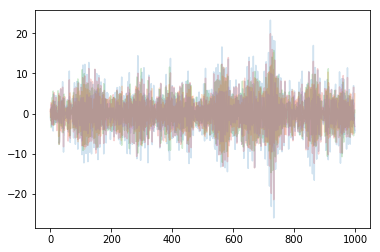

In [35]:
for j in range(5):
    plt.plot(time_series[:1000, j], alpha=0.2)
plt.show()

In [25]:
cov_series_hat = np.zeros((100, 5, 5))
log_series_hat = np.zeros((100, 15))
for t in range(100):
    sliding_window = time_series[(t * 10):(t * 10 + 100), :]
    cov_hat = np.cov(sliding_window, rowvar=False)
    cov_series_hat[t, :, :] = cov_hat
    log_hat = logm(cov_hat)[np.triu_indices(5)]
    log_series_hat[t, :] = log_hat

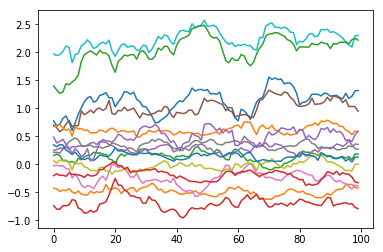

In [26]:
for j in range(15):
    plt.plot(log_series_hat[:, j])
plt.show()

In [36]:
log_series_sample = np.zeros((50, 100, 15))
for i in range(50):
    ts = time_series.copy()
    for t in range(2, 1200):
        lag = np.matmul(A1, ts[t - 1, :].reshape((5, 1))) + np.matmul(A2, ts[t - 2, :].reshape((5, 1)))
        ts[t, :] = lag[:, 0] + np.random.normal(0, 1, 5)
    log_series_hat = np.zeros((100, 15))
    for t in range(100):
        sliding_window = ts[(t * 10):(t * 10 + 100), :]
        cov_hat = np.cov(sliding_window, rowvar=False)
        cov_series_hat[t, :, :] = cov_hat
        log_hat = logm(cov_hat)[np.triu_indices(5)]
        log_series_hat[t, :] = log_hat
    log_series_sample[i, :, :] = log_series_hat

In [50]:
log_series_mean = np.mean(log_series_sample, axis=0)

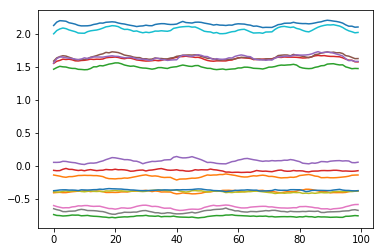

In [51]:
for j in range(15):
    plt.plot(log_series_mean[:, j])
plt.show()

In [19]:
Y = log_series_hat

In [20]:
from sklearn.decomposition import PCA

In [21]:
pca = PCA(n_components=2)
components = pca.fit_transform(Y)

In [22]:
Y_hat = pca.inverse_transform(components)
mse = np.mean((Y - Y_hat) ** 2)
print(mse)

0.004488151149286947


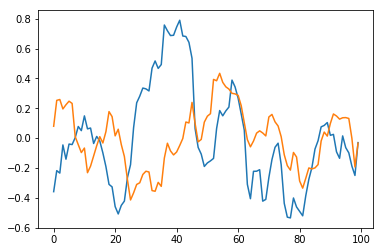

In [23]:
for j in range(2):
    plt.plot(components[:, j])
plt.show()

In [24]:
from factorgp import FactorGP
from inference import run_gibbs

In [25]:
dims = [1, 100, 15, 2]
model = FactorGP(dims)
model.update_conditional_latent(Y)

In [26]:
results = run_gibbs(Y, model, 50, 50, 0.5, verbose=True)

  2%|▏         | 1/50 [00:10<08:23, 10.27s/it]

Current MSE: 0.0123208265527
Current length scale: [9.70070556 9.55166421]


  4%|▍         | 2/50 [00:20<08:11, 10.23s/it]

Current MSE: 0.0100469733348
Current length scale: [10.85242183  9.36071231]


  6%|▌         | 3/50 [00:30<08:01, 10.24s/it]

Current MSE: 0.00775930816981
Current length scale: [10.12585359  9.53016284]


  8%|▊         | 4/50 [00:40<07:51, 10.25s/it]

Current MSE: 0.00766193264567
Current length scale: [9.72336771 9.52450245]


 10%|█         | 5/50 [00:51<07:40, 10.23s/it]

Current MSE: 0.00935938591098
Current length scale: [10.14931279  9.23530916]


 12%|█▏        | 6/50 [01:01<07:28, 10.18s/it]

Current MSE: 0.00922395686261
Current length scale: [10.60653769  9.09391512]


 14%|█▍        | 7/50 [01:11<07:18, 10.19s/it]

Current MSE: 0.00880544953826
Current length scale: [10.47667278  8.80852869]


 16%|█▌        | 8/50 [01:21<07:05, 10.14s/it]

Current MSE: 0.00881548732871
Current length scale: [11.23636397  9.607319  ]


 18%|█▊        | 9/50 [01:31<06:58, 10.20s/it]

Current MSE: 0.00878308213104
Current length scale: [11.72856336  9.26466813]


 20%|██        | 10/50 [01:41<06:47, 10.19s/it]

Current MSE: 0.00891589851088
Current length scale: [11.92329922  9.27391517]


 22%|██▏       | 11/50 [01:52<06:36, 10.16s/it]

Current MSE: 0.00987728424403
Current length scale: [11.70677453  8.7695374 ]


 24%|██▍       | 12/50 [02:02<06:24, 10.12s/it]

Current MSE: 0.00922651998944
Current length scale: [11.27790322  9.00255895]


 26%|██▌       | 13/50 [02:12<06:15, 10.15s/it]

Current MSE: 0.00812419035743
Current length scale: [11.93100225  9.52249248]


 28%|██▊       | 14/50 [02:22<06:05, 10.15s/it]

Current MSE: 0.00904096963211
Current length scale: [11.55563204  9.61101038]


 30%|███       | 15/50 [02:33<06:05, 10.44s/it]

Current MSE: 0.00844119771994
Current length scale: [11.41657672 10.22501338]


 32%|███▏      | 16/50 [02:43<05:53, 10.39s/it]

Current MSE: 0.00783205060357
Current length scale: [11.64426392 10.21482298]


 34%|███▍      | 17/50 [02:53<05:39, 10.30s/it]

Current MSE: 0.00912087530194
Current length scale: [11.33927252 10.11485826]


 36%|███▌      | 18/50 [03:03<05:25, 10.18s/it]

Current MSE: 0.00856604769145
Current length scale: [11.61901107 10.47529506]


 38%|███▊      | 19/50 [03:13<05:14, 10.15s/it]

Current MSE: 0.0087900098368
Current length scale: [11.51442322 11.20591038]


 40%|████      | 20/50 [03:23<05:03, 10.10s/it]

Current MSE: 0.00933773104808
Current length scale: [10.92387748 11.11835549]


 42%|████▏     | 21/50 [03:34<04:55, 10.20s/it]

Current MSE: 0.0100510727039
Current length scale: [10.51515917 11.26009658]


 44%|████▍     | 22/50 [03:44<04:45, 10.19s/it]

Current MSE: 0.00839920880351
Current length scale: [11.10422375 10.82006955]


 46%|████▌     | 23/50 [03:54<04:36, 10.23s/it]

Current MSE: 0.00873946934058
Current length scale: [11.41587001 11.9558613 ]


 48%|████▊     | 24/50 [04:05<04:28, 10.33s/it]

Current MSE: 0.00856924653798
Current length scale: [11.26527147 11.77858886]


 50%|█████     | 25/50 [04:15<04:15, 10.23s/it]

Current MSE: 0.00876145120016
Current length scale: [11.14428587 10.31250178]


 52%|█████▏    | 26/50 [04:25<04:04, 10.17s/it]

Current MSE: 0.00819485192879
Current length scale: [10.94846255  9.948737  ]


 54%|█████▍    | 27/50 [04:35<03:52, 10.11s/it]

Current MSE: 0.00805212602935
Current length scale: [10.99049384 10.30885002]


 56%|█████▌    | 28/50 [04:45<03:41, 10.08s/it]

Current MSE: 0.00856348256103
Current length scale: [11.24111985  9.902024  ]


 58%|█████▊    | 29/50 [04:55<03:31, 10.05s/it]

Current MSE: 0.00889340559612
Current length scale: [10.85502663 10.52042528]


 60%|██████    | 30/50 [05:05<03:20, 10.01s/it]

Current MSE: 0.0091192821329
Current length scale: [10.18701716 10.89601544]


 62%|██████▏   | 31/50 [05:15<03:09, 10.00s/it]

Current MSE: 0.00835049033134
Current length scale: [10.18303062 10.3566125 ]


 64%|██████▍   | 32/50 [05:25<03:00, 10.02s/it]

Current MSE: 0.00845918614405
Current length scale: [10.4679405  10.14830053]


 66%|██████▌   | 33/50 [05:35<02:49, 10.00s/it]

Current MSE: 0.00787368744268
Current length scale: [10.25997049 10.27152138]


 68%|██████▊   | 34/50 [05:45<02:40, 10.03s/it]

Current MSE: 0.00819097724699
Current length scale: [10.18173667  9.93044092]


 70%|███████   | 35/50 [05:55<02:30, 10.05s/it]

Current MSE: 0.00865884252623
Current length scale: [10.32597746 10.09404674]


 72%|███████▏  | 36/50 [06:05<02:20, 10.03s/it]

Current MSE: 0.00868074083932
Current length scale: [10.12790871  9.97107044]


 74%|███████▍  | 37/50 [06:15<02:10, 10.02s/it]

Current MSE: 0.00870395517194
Current length scale: [10.52938467 10.06501438]


 76%|███████▌  | 38/50 [06:25<02:00, 10.05s/it]

Current MSE: 0.00802811209405
Current length scale: [10.52082507 10.44557048]


 78%|███████▊  | 39/50 [06:35<01:50, 10.04s/it]

Current MSE: 0.00803490290218
Current length scale: [10.32725829 10.59958864]


 80%|████████  | 40/50 [06:45<01:40, 10.07s/it]

Current MSE: 0.00832973961256
Current length scale: [10.15477977 10.60085058]


 82%|████████▏ | 41/50 [06:55<01:30, 10.02s/it]

Current MSE: 0.00869882238947
Current length scale: [10.2088826  10.28143357]


 84%|████████▍ | 42/50 [07:06<01:21, 10.18s/it]

Current MSE: 0.00889207878715
Current length scale: [10.22013443 10.26373056]


 86%|████████▌ | 43/50 [07:18<01:14, 10.71s/it]

Current MSE: 0.00861289187053
Current length scale: [10.52602309 10.07383432]


 88%|████████▊ | 44/50 [07:30<01:06, 11.15s/it]

Current MSE: 0.00806075929205
Current length scale: [10.70377095 10.22844277]


 90%|█████████ | 45/50 [07:41<00:56, 11.20s/it]

Current MSE: 0.00844603603191
Current length scale: [11.22360574 10.16657104]


 92%|█████████▏| 46/50 [07:52<00:44, 11.24s/it]

Current MSE: 0.00925020093975
Current length scale: [11.13189234  9.45331206]


 94%|█████████▍| 47/50 [08:04<00:33, 11.27s/it]

Current MSE: 0.00845647966358
Current length scale: [10.35760297  9.57037017]


 96%|█████████▌| 48/50 [08:15<00:22, 11.13s/it]

Current MSE: 0.00829431792892
Current length scale: [10.02560999  8.95835403]


 98%|█████████▊| 49/50 [08:25<00:10, 10.96s/it]

Current MSE: 0.00783549394623
Current length scale: [10.91066861  8.98478793]


100%|██████████| 50/50 [08:36<00:00, 10.79s/it]

Current MSE: 0.00913888243591
Current length scale: [10.94776642  9.68305964]


In [27]:
F_sample, loading_sample, variance_sample, theta_sample, traces_hist, mse_history = results

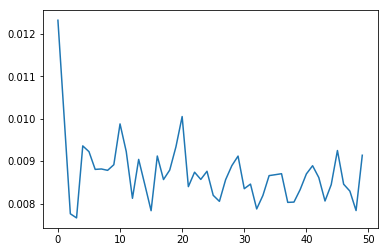

In [28]:
plt.plot(mse_history)
plt.show()

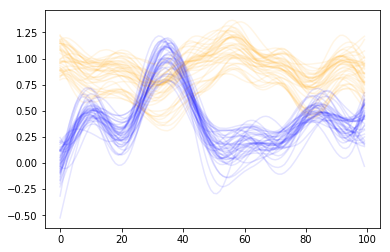

In [30]:
for i in range(10, 50):
    plt.plot(-F_sample[i, :, 0], color='blue', alpha=0.1)
    plt.plot(-F_sample[i, :, 1], color='orange', alpha=0.1)
plt.show()